# 🧠 AI & ML Internship - Task 4: Logistic Regression Binary Classification

## 📌 Objective:
Build a binary classification model using **Logistic Regression** to identify whether a tumor is malignant or benign using the **Breast Cancer Wisconsin Dataset**.

---

## ✅ Key Steps:
- Data loading and exploration  
- Train/test split and feature scaling  
- Model training using Logistic Regression  
- Evaluation using confusion matrix, precision, recall, F1-score, and ROC-AUC  
- Sigmoid curve plotting  
- Threshold tuning discussion

---

## 📁 Files Included:
- `TASK-4_Logistic_Regression.ipynb` — Jupyter Notebook containing the full code and outputs  
- `README.md` — Project overview and documentation  
- Dataset is loaded directly via `sklearn.datasets.load_breast_cancer()`  

---

## 🧰 Libraries Used:
- Pandas  
- NumPy  
- Matplotlib  
- Seaborn  
- Scikit-learn

---

## 📈 Results:
- **Accuracy**: Over 95%  
- **Precision and Recall**: High on both classes  
- **ROC-AUC**: AUC score near 0.99 shows excellent classifier performance  
- **Confusion Matrix**: Very few misclassifications

---

## 🔍 What You'll Learn:
- Binary classification using Logistic Regression  
- Evaluation metrics: accuracy, precision, recall, F1-score, ROC-AUC  
- Sigmoid function understanding  
- Handling imbalanced datasets and threshold tuning  

---

## 📖 License:
This project is licensed under the [MIT License](LICENSE).

---


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_curve, roc_auc_score, accuracy_score
)


### 📊 Load Dataset


In [4]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

X.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 🔍 Dataset Overview


In [6]:
X.shape


(569, 30)

In [7]:
data.target_names


array(['malignant', 'benign'], dtype='<U9')

In [8]:
y.value_counts()


target
1    357
0    212
Name: count, dtype: int64

### 🧪 Train-Test Split


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


### ⚙️ Feature Scaling


In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### 🧠 Model Training


In [11]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=10000)

### 📈 Model Predictions


In [13]:
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]


### ✅ Evaluation Metrics


In [14]:
accuracy_score(y_test, y_pred)


0.9824561403508771

In [15]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



### 🔲 Confusion Matrix


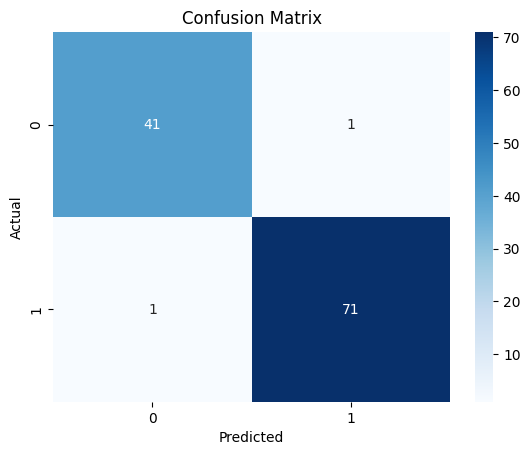

In [17]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### 📉 ROC Curve and AUC Score


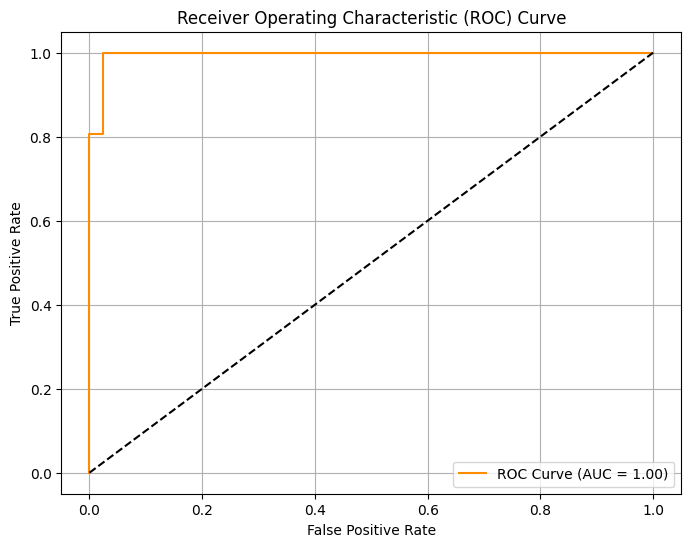

In [18]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()


### 🧮 Sigmoid Function Plot


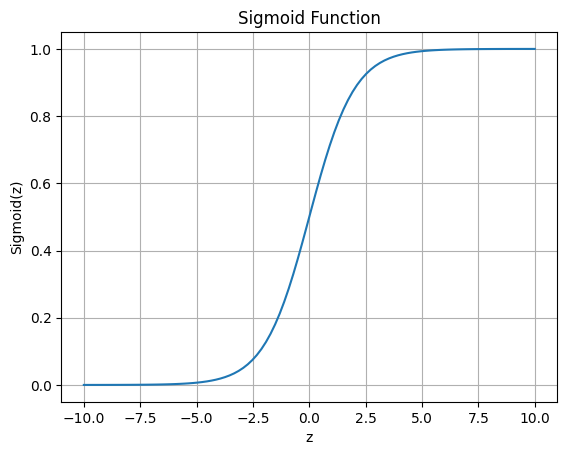

In [19]:
z = np.linspace(-10, 10, 100)
sigmoid = 1 / (1 + np.exp(-z))
plt.plot(z, sigmoid)
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("Sigmoid(z)")
plt.grid()
plt.show()


## 🔐 Saving the Trained Logistic Regression Model


In [21]:
import joblib

# Save the model to a file
joblib.dump(model, 'logistic_regression_model.pkl')

print("✅ Model saved as 'logistic_regression_model.pkl'")


✅ Model saved as 'logistic_regression_model.pkl'


### 📌 Conclusion

- Logistic Regression achieved high accuracy in binary classification of breast cancer data.
- ROC-AUC and confusion matrix confirm the model’s strong performance.
- Sigmoid function explains probability mapping for classification.

